In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- Config ---
INPUT = "../rawdata/combine_news_final.csv"
OUTPUT = "../rawdata/combine_news_final_truncated.csv"
MAX_TOKENS = 512


In [4]:
# --- Step 1: Load dataset ---
df = pd.read_csv(INPUT)
print(f"✅ Loaded {len(df)} rows")


✅ Loaded 16997 rows


In [15]:
print("Token max valid (should be <= 512):", df[df["label"] == 0]["Text"].str.split().apply(len).max())

Token max valid (should be <= 512): 512


count    8513.000000
mean      319.396100
std       100.960606
min        21.000000
25%       245.000000
50%       306.000000
75%       385.000000
max       512.000000
Name: token_len, dtype: float64


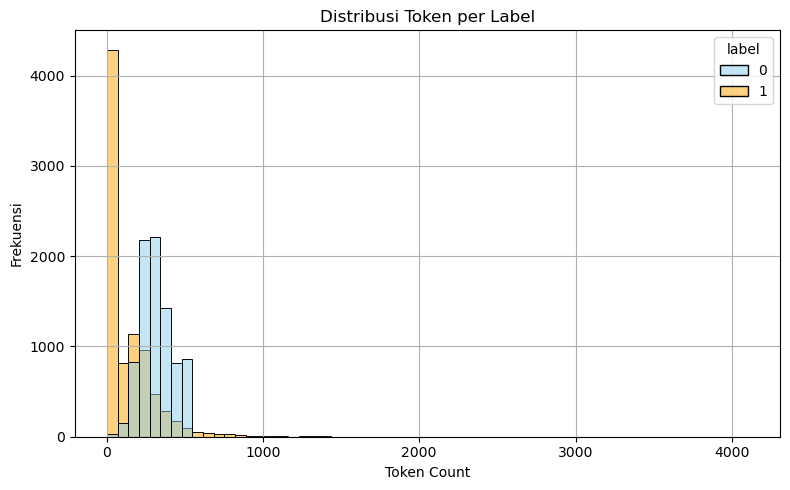

In [19]:
def truncate_text(text):
    return " ".join(str(text).split()[:512])

# Terapkan ke label 0
df.loc[df["label"] == 0, "Text"] = df.loc[df["label"] == 0, "Text"].apply(truncate_text)

# Hitung ulang token_len
df["token_len"] = df["Text"].astype(str).str.split().apply(len)

# Cek hasil
print(df[df["label"] == 0]["token_len"].describe())

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="token_len", hue="label", bins=60, palette=["skyblue", "orange"])
plt.title("Distribusi Token per Label")
plt.xlabel("Token Count")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.tight_layout()
plt.show()


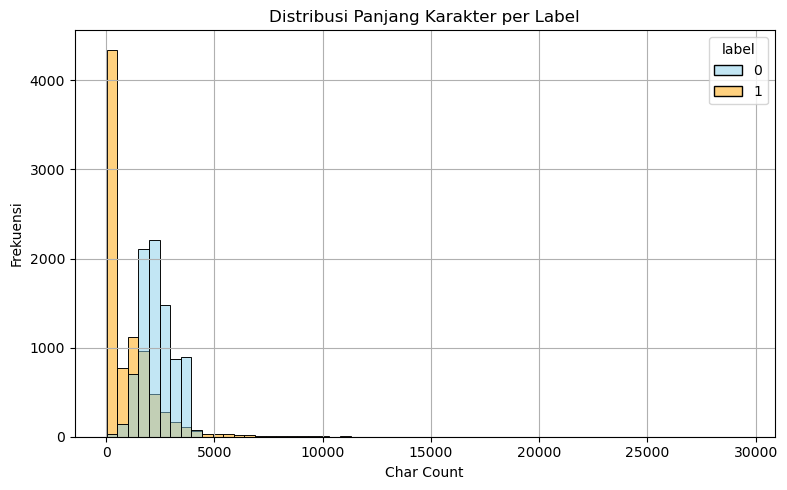

In [8]:
# --- Step 4: Visualize distributions ---

# Plot: Character Length
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="char_len", hue="label", bins=60, palette=["skyblue", "orange"])
plt.title("Distribusi Panjang Karakter per Label")
plt.xlabel("Char Count")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.tight_layout()
plt.show()


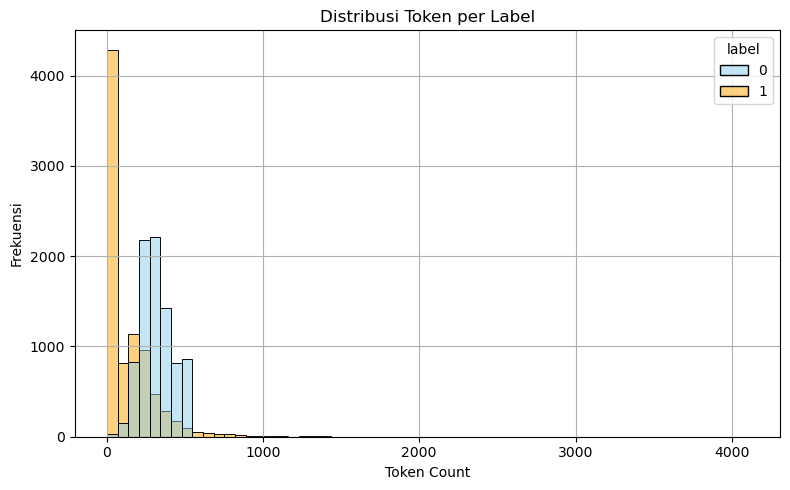

In [9]:
# Plot: Token Length
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="token_len", hue="label", bins=60, palette=["skyblue", "orange"])
plt.title("Distribusi Token per Label")
plt.xlabel("Token Count")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# --- Step 5: Save ---
os.makedirs("../rawdata", exist_ok=True)
df.to_csv(OUTPUT, index=False)
print(f"✅ Truncated dataset saved → {OUTPUT}")


✅ Truncated dataset saved → ../rawdata/combine_news_final_truncated.csv


✅ Loaded 16997 rows


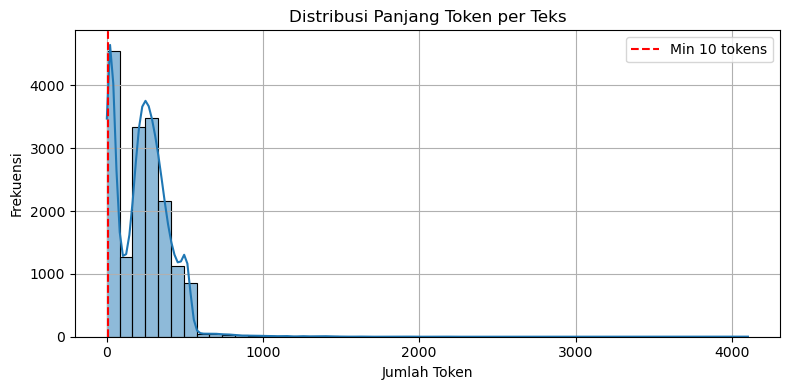

🔍 Dibuang: 391 teks pendek (<10 tokens)
✅ Sisa: 16606 teks siap untuk training
💾 Saved to ../cleandata/train_dataset.csv


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Config ---
INPUT_PATH = "../rawdata/combine_news_final_truncated.csv"
OUTPUT_PATH = "../cleandata/train_dataset.csv"
MIN_TOKEN_LEN = 10

# --- Load Data ---
df = pd.read_csv(INPUT_PATH)
print(f"✅ Loaded {len(df)} rows")

# --- Hitung jumlah token per teks ---
df["token_len"] = df["Text"].astype(str).str.split().apply(len)

# --- Visualisasi distribusi panjang token ---
plt.figure(figsize=(8,4))
sns.histplot(df["token_len"], bins=50, kde=True)
plt.axvline(MIN_TOKEN_LEN, color='red', linestyle='--', label=f"Min {MIN_TOKEN_LEN} tokens")
plt.title("Distribusi Panjang Token per Teks")
plt.xlabel("Jumlah Token")
plt.ylabel("Frekuensi")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Filter teks yang terlalu pendek ---
before = len(df)
df = df[df["token_len"] >= MIN_TOKEN_LEN].copy()
after = len(df)
print(f"🔍 Dibuang: {before - after} teks pendek (<{MIN_TOKEN_LEN} tokens)")
print(f"✅ Sisa: {after} teks siap untuk training")

# --- Simpan hanya kolom untuk training ---
df_train = df[["Text", "label"]].dropna()
df_train["label"] = df_train["label"].astype(int)
df_train.to_csv(OUTPUT_PATH, index=False)
print(f"💾 Saved to {OUTPUT_PATH}")
